<a href="https://colab.research.google.com/github/Deepika26991/DV_Assignment/blob/main/Taks4_DV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

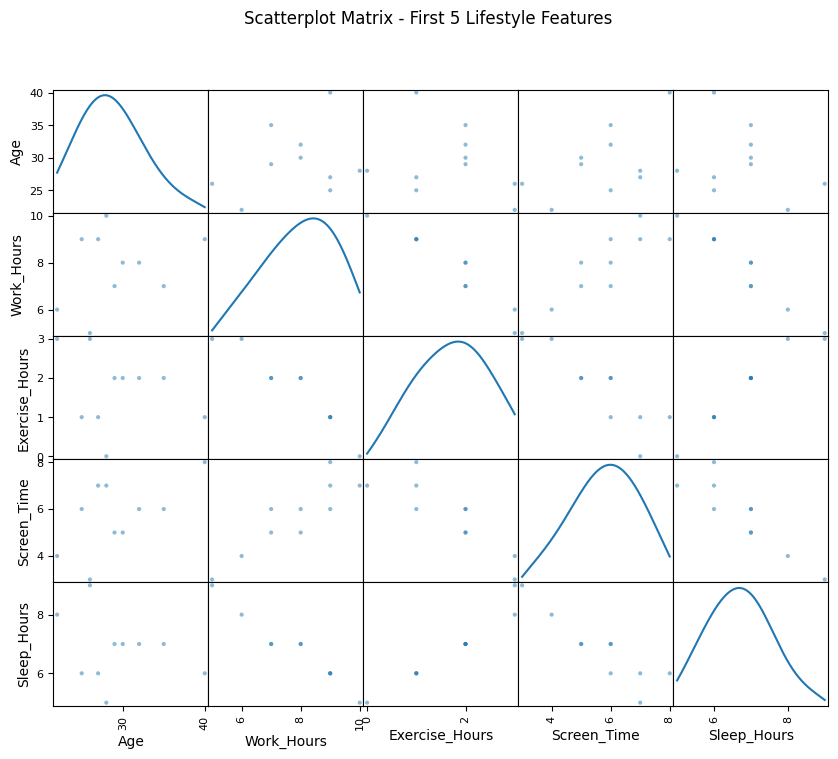

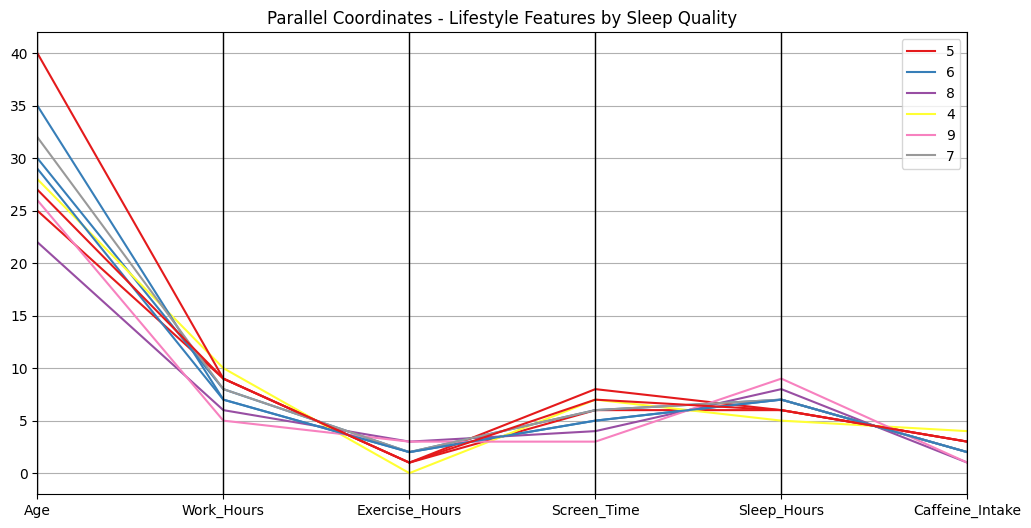

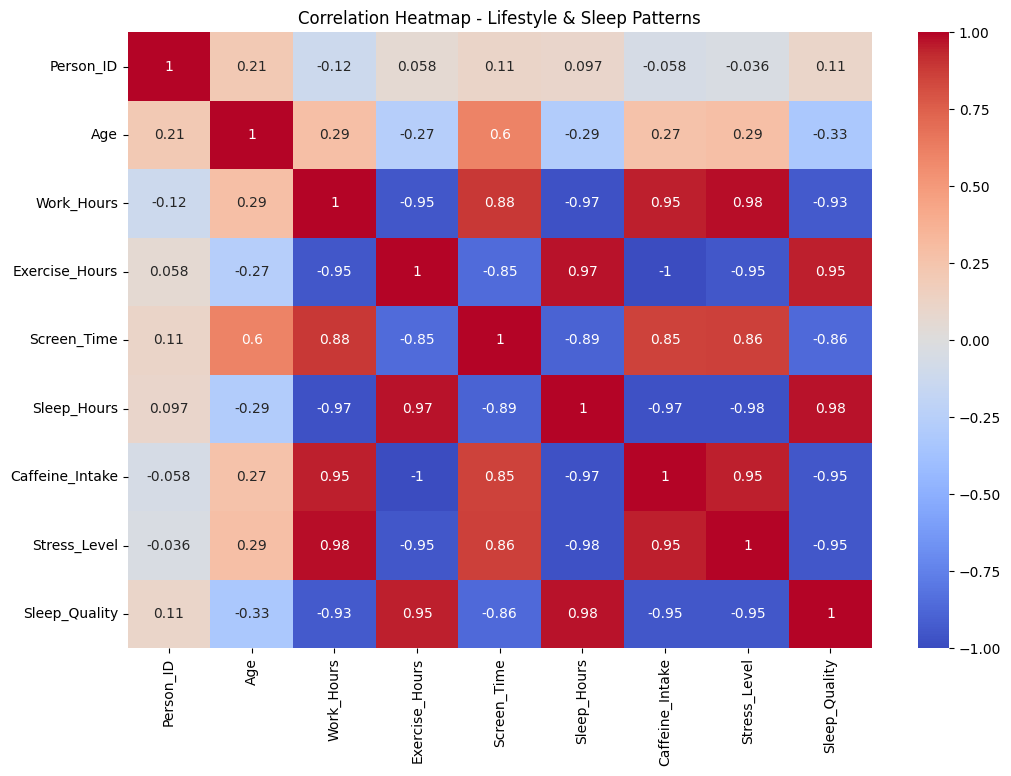

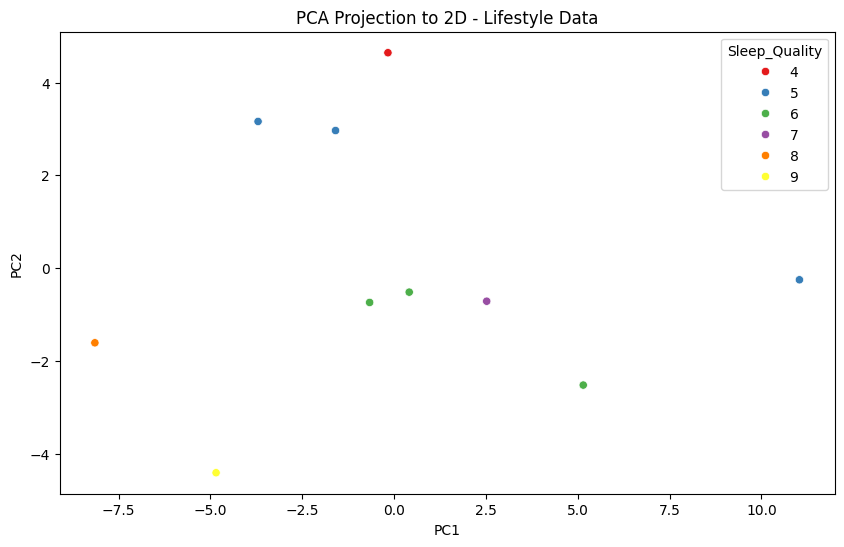

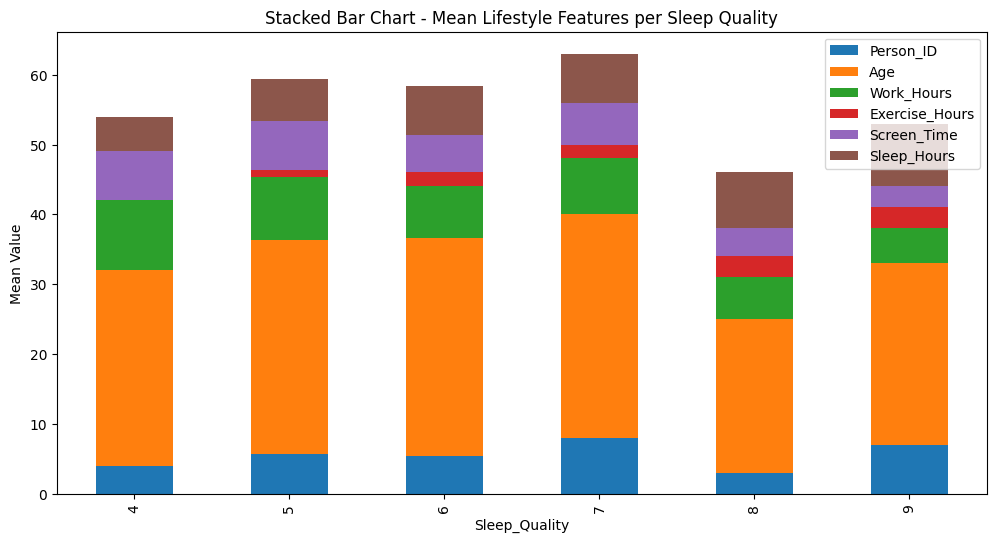

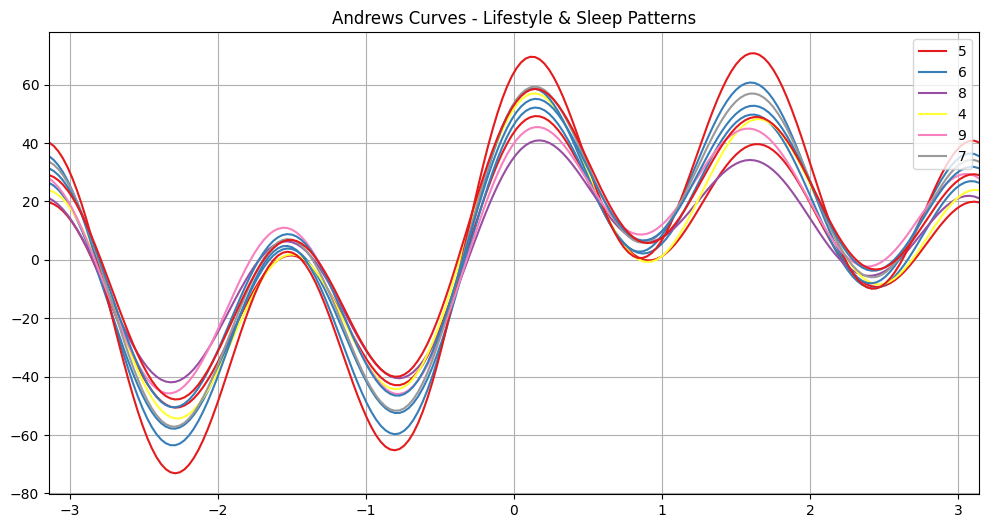

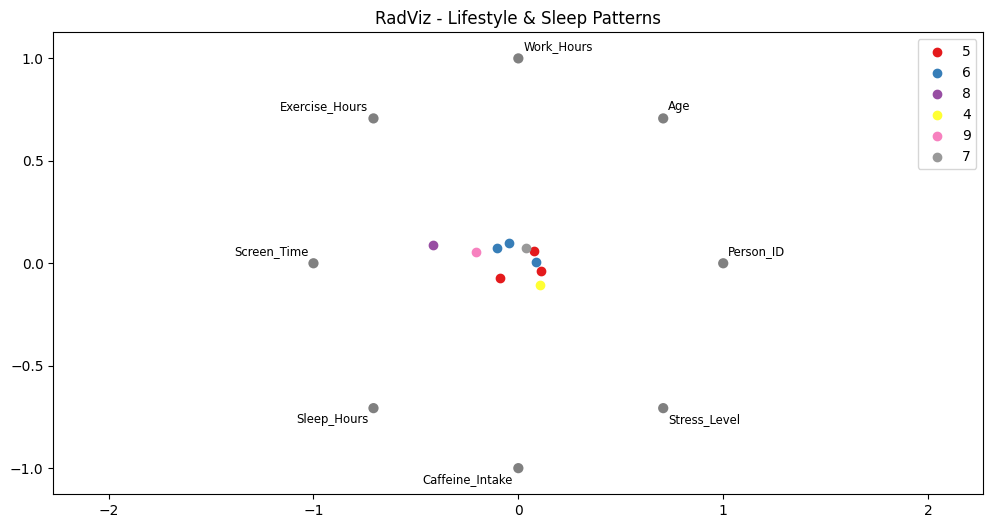

In [ ]:



import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix, parallel_coordinates, andrews_curves, radviz
import seaborn as sns
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("lifestyle_sleep.csv")

# =========================
# Scatterplot Matrix
# =========================
scatter_matrix(df.iloc[:, 1:6], figsize=(10, 8), diagonal='kde')
plt.suptitle("Scatterplot Matrix - First 5 Lifestyle Features")
plt.show()

# =========================
# Parallel Coordinates
# =========================
plt.figure(figsize=(12, 6))
parallel_coordinates(df, 'Sleep_Quality', cols=df.columns[1:7], colormap=plt.get_cmap("Set1"))
plt.title("Parallel Coordinates - Lifestyle Features by Sleep Quality")
plt.show()

# =========================
# Correlation Heatmap
# =========================
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Lifestyle & Sleep Patterns")
plt.show()

# =========================
# PCA for Dimensionality Reduction
# =========================
pca = PCA(n_components=2)
X = df.drop(columns=['Person_ID', 'Sleep_Quality'])
pca_result = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Sleep_Quality'] = df['Sleep_Quality']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Sleep_Quality', data=pca_df, palette='Set1')
plt.title("PCA Projection to 2D - Lifestyle Data")
plt.show()

# =========================
# Stacked Bar Chart
# =========================
class_means = df.groupby('Sleep_Quality').mean().iloc[:, :6]
class_means.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Stacked Bar Chart - Mean Lifestyle Features per Sleep Quality")
plt.ylabel("Mean Value")
plt.show()

# =========================
# Andrews Curves
# =========================
plt.figure(figsize=(12, 6))
andrews_curves(df, 'Sleep_Quality', colormap="Set1")
plt.title("Andrews Curves - Lifestyle & Sleep Patterns")
plt.show()

# =========================
# RadViz
# =========================
plt.figure(figsize=(12, 6))
radviz(df, 'Sleep_Quality', colormap="Set1")
plt.title("RadViz - Lifestyle & Sleep Patterns")
plt.show()
